In [9]:
import numpy as np
import pandas as pd

In [10]:
data=pd.read_csv('/content/drive/MyDrive/DL/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
data=data.dropna()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
df=data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1


In [14]:
from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()


df['gender']=le.fit_transform(data['gender'])


df['ever_married']=le.fit_transform(data['ever_married'])


df['work_type']=le.fit_transform(data['work_type'])


df['Residence_type']=le.fit_transform(data['Residence_type'])


df['smoking_status']=le.fit_transform(data['smoking_status'])


df.head()


<ipython-input-14-7c98983e0f5b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=le.fit_transform(data['gender'])
<ipython-input-14-7c98983e0f5b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married']=le.fit_transform(data['ever_married'])
<ipython-input-14-7c98983e0f5b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2
5,81.0,0,0,186.21,29.0,1,1,1,2,1,1


In [15]:
data.shape,df.shape


y=df['stroke']


x=df.drop('stroke',axis=1)


x.shape,y.shape


((4909, 10), (4909,))

Text(0.5, 1.0, 'COUNT PLOT')

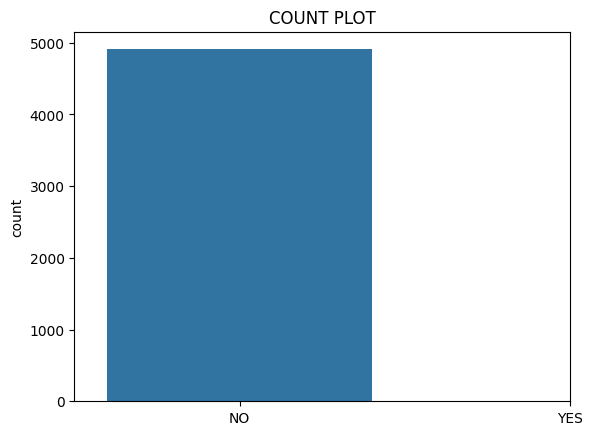

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt


sns.countplot(y)


plt.xticks([0,1],['NO','YES'])


plt.title('COUNT PLOT')


In [17]:
from sklearn.model_selection import train_test_split as tts


x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)


In [18]:
import tensorflow as tf
ann=tf.keras.Sequential()


ann.add(tf.keras.layers.Dense(units=25,activation='relu'))


ann.add(tf.keras.layers.Dense(units=25,activation='relu'))


ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


ann.compile('adam','binary_crossentropy',metrics=['accuracy'])


In [19]:
 result=ann.fit(x_train,y_train,epochs=10)


Epoch 1/10
123/123 [==============================] - 2s 3ms/step - loss: 0.2439 - accuracy: 0.9539
Epoch 2/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9557
Epoch 3/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9537
Epoch 4/10
123/123 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9511
Epoch 5/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9544
Epoch 6/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9529
Epoch 7/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9539
Epoch 8/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9529
Epoch 9/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.9521
Epoch 10/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9537

In [20]:
from sklearn.metrics import confusion_matrix
y_pred=[]
for i in ann.predict(x_test):
                    if i>0.5:
                              y_pred.append(1)
                    if i<0.5:
                              y_pred.append(0)
confusion_matrix(y_test,y_pred)

31/31 [==============================] - 0s 1ms/step


array([[937,   7],
       [ 35,   3]])

In [21]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9572301425661914